# Assignment 1

__*m Ilyes Justin <br>
m11804717 Seidl Stefan <br>
m Wagemaier Daniel*__ <br>

## 1) Import Librarys, data and create test and training sets

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [11, 5] #change inline figure size [width, higth]

df = pd.read_csv("alldigits.csv")
data = df.to_numpy()

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)


## 2) Plotting the Images

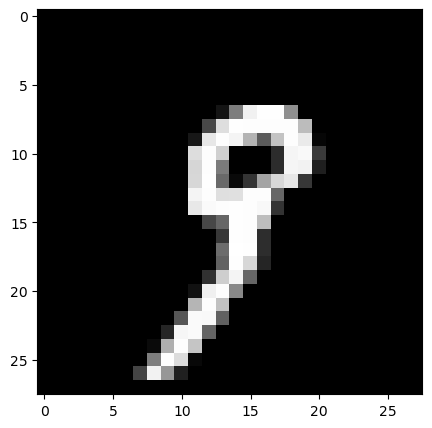

In [179]:
pictures = []
for row in data:
    single_picture_matrix = []
    for i in range(28):
        innerList = []
        for j in range(28):
            innerList.append(int(row[j * 28 + i]))
        single_picture_matrix.append(innerList)
    pictures.append(single_picture_matrix)


n = 19    
plt.imshow(pictures[n], cmap='Greys_r', vmin=0, vmax=255)
plt.show() 

# 3) Analyse the Data

Points in Trainset: 600
Points in Testset: 5400
Test/Train Ratio: 9.0


Text(0.5, 0, 'Numbers')

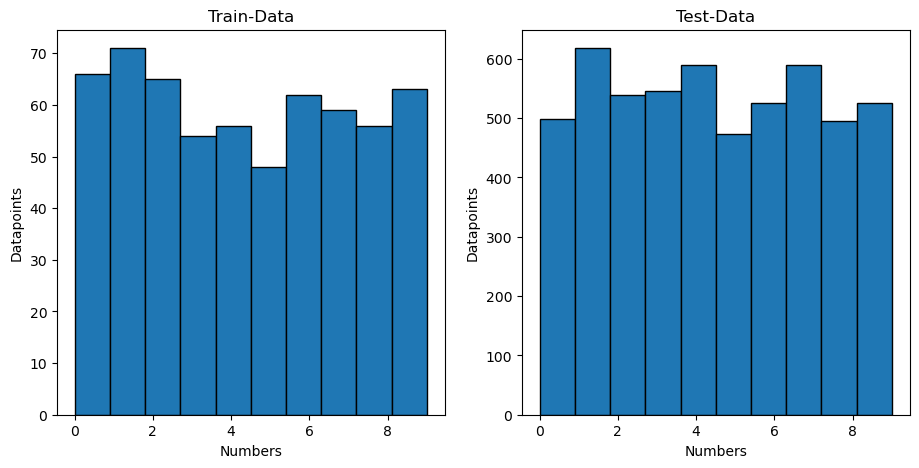

In [180]:
print("Points in Trainset: " + str(len(y_train)))
print("Points in Testset: " + str(len(y_test)))
print("Test/Train Ratio: " + str(len(y_test)/len(y_train)))

plt.figure(1)
plt.align = "mid"
plt.subplot(121)
plt.hist(y_train,10,edgecolor="black")
plt.title("Train-Data")
plt.xlabel("Numbers")
plt.ylabel("Datapoints")
plt.subplot(122)
plt.hist(y_test,10,edgecolor="black")
plt.title("Test-Data")
plt.ylabel("Datapoints")
plt.xlabel("Numbers")



# 4) Decision Tree

# 5) Naive Bayes

In [181]:
total_points_testSet = len(y_test)

## 5.1) Gaussian 


In [182]:
gnb = GaussianNB()
y_pred_gauss = gnb.fit(X_train, y_train).predict(X_test)
gauss_correct_labeled = (y_test == y_pred_gauss).sum()
print("Correct labeled(Gauss): " + str(gauss_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((gauss_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Gauss): 3183 from 5400 (58.94444444444444%)


## 5.2) Multinominal

In [183]:
mNB = MultinomialNB()
y_pred_multi = mNB.fit(X_train, y_train).predict(X_test)
multi_correct_labeled = (y_test == y_pred_multi).sum()
print("Correct labeled(Multinominal): " + str(multi_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((multi_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Multinominal): 4412 from 5400 (81.7037037037037%)


## 5.3) Complement

In [184]:
cNB = ComplementNB()
y_pred_comp = cNB.fit(X_train, y_train).predict(X_test)
comp_correct_labeled = (y_test == y_pred_comp).sum()
print("Correct labeled(Complement): " + str(comp_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((comp_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Complement): 3806 from 5400 (70.48148148148148%)


## 5.4) Bernoulli

In [185]:
bNB = BernoulliNB()
y_pred_ber = bNB.fit(X_train, y_train).predict(X_test)
ber_correct_labeled = (y_test == y_pred_ber).sum()
print("Correct labeled(Bernoulli): " + str(ber_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((ber_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Bernoulli): 4374 from 5400 (81.0%)


## 5.5) Categorical

In [186]:
catNB = CategoricalNB(min_categories=256)
y_pred_cat = catNB.fit(X_train, y_train).predict(X_test)
cat_correct_labeled = (y_test == y_pred_cat).sum()
print("Correct labeled(Bernoulli): " + str(cat_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((cat_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Bernoulli): 1646 from 5400 (30.48148148148148%)


## 5.6) Summary

*RNG_Seed = 0*

|test_size|Gaussian|Mutlinominal|Complement|Bernoulli|Categorical|
|---|---|---|---|---|---|
|0.1|57.33|82.83|70.17|84.17|67.17|
|0.3|56.28|82.67|70.22|83.83|62.56|
|0.5|55.7|82.17|70.63|82.63|57.3|
|0.7|56.12|82.26|70.95|81.95|48.74|
|0.9|58.94|81.7|70.48|81.0|30.48|